## Bayesian Networks for Obesity Predictions

In this section, we will use two methods to construct Bayesian Networks for predicting obesity: the **Hillclimb search method** and the **Chow-Liu method**. We will use data related to eating habits, physical activity, and family history to model the likelihood of obesity using these methods.

### Dataset Import and Preparation

We start by importing the dataset that contains information about over 2000 individuals, including details about their eating habits, physical activity, and family history of obesity from **OB.csv**.



In [26]:
import pandas as pd
import bnlearn
from pgmpy.factors.discrete import TabularCPD

# Load the dataset
df = pd.read_csv("OB.csv")


### Building Bayesian Networks
1. Hillclimb Search Method
The **Hillclimb** search method is used to find a Directed Acyclic Graph (DAG) structure that best fits the data, using the Bayesian Information Criterion (BIC) score.

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


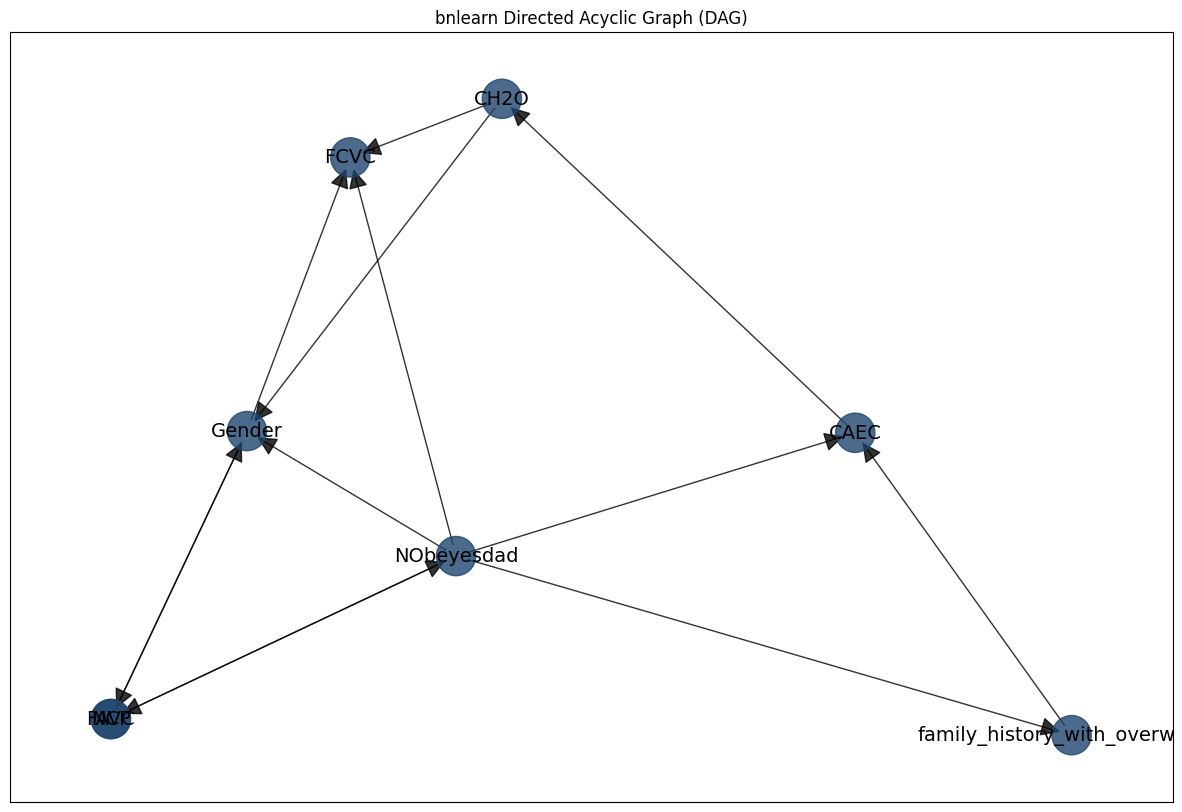

{'fig': <Figure size 1500x1000 with 1 Axes>, 'ax': <Figure size 1500x1000 with 1 Axes>, 'pos': {'Gender': array([-0.35494438,  0.11336168]), 'FAVC': array([-0.57851942, -0.53830546]), 'FCVC': array([-0.18512953,  0.73271637]), 'family_history_with_overweight': array([ 1.        , -0.57482618]), 'CAEC': array([0.644515  , 0.10955103]), 'NCP': array([-0.57851942, -0.53830546]), 'NObeyesdad': array([-0.01135245, -0.16952972]), 'CH2O': array([0.06395021, 0.86533774])}, 'G': <networkx.classes.digraph.DiGraph object at 0x00000217B4E2C2F0>, 'node_properties': {'Gender': {'node_color': '#1f456e', 'node_size': 800}, 'family_history_with_overweight': {'node_color': '#1f456e', 'node_size': 800}, 'FAVC': {'node_color': '#1f456e', 'node_size': 800}, 'FCVC': {'node_color': '#1f456e', 'node_size': 800}, 'NCP': {'node_color': '#1f456e', 'node_size': 800}, 'CAEC': {'node_color': '#1f456e', 'node_size': 800}, 'CH2O': {'node_color': '#1f456e', 'node_size': 800}, 'NObeyesdad': {'node_color': '#1f456e', 'n

In [30]:

# Build a DAG using Hillclimb search method
model_hc = bnlearn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
print(bnlearn.plot(model_hc))


2. Chow-Liu Method
The **Chow-Liu** method is another approach for structure learning, where we first convert the data into one-hot encoding and then build a tree-structured Bayesian Network.


[df2onehot] >Auto detecting dtypes.


100%|██████████| 8/8 [00:00<00:00, 140.35it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 8/8 [00:00<00:00, 235.56it/s]

[df2onehot] >Total onehot features: 22
[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/28.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


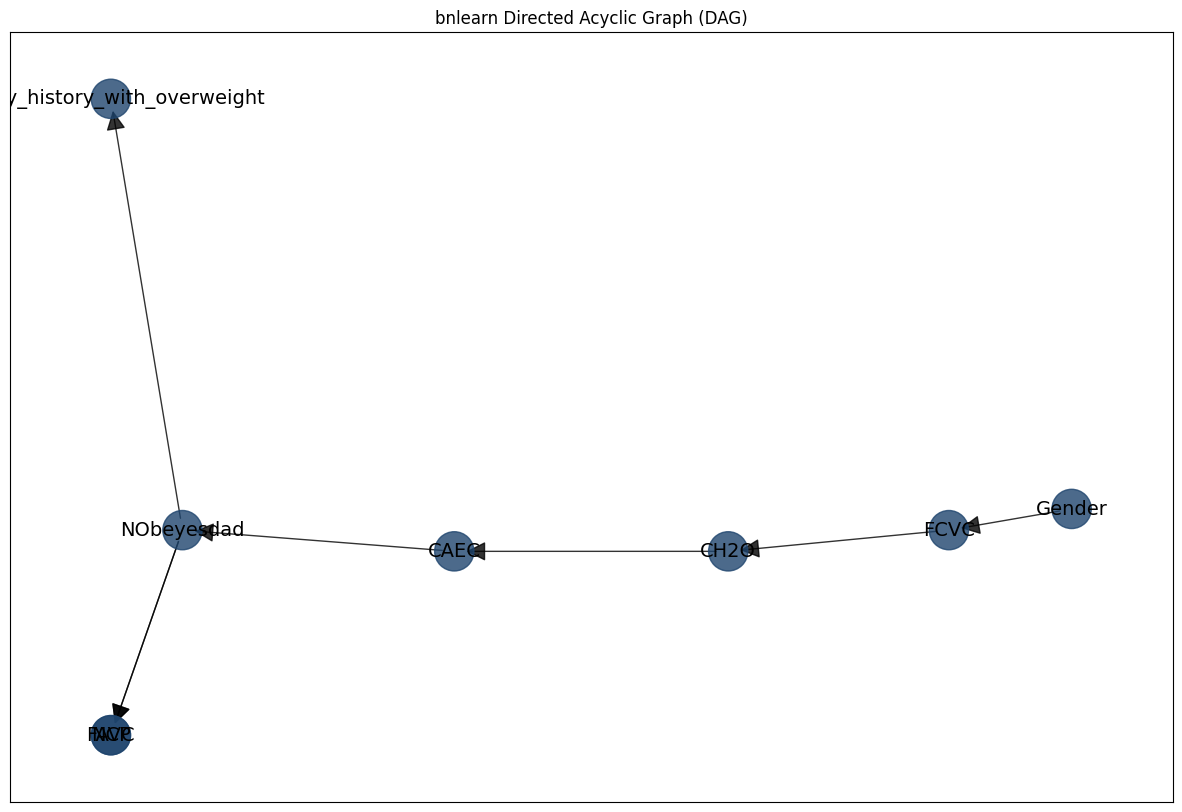

{'fig': <Figure size 1500x1000 with 1 Axes>, 'ax': <Figure size 1500x1000 with 1 Axes>, 'pos': {'Gender': array([0.69037849, 0.04918033]), 'FCVC': array([5.50744832e-01, 1.33667646e-17]), 'CH2O': array([ 0.29971936, -0.04918033]), 'CAEC': array([-0.01192635, -0.04918033]), 'NObeyesdad': array([-3.21159882e-01, -5.88264149e-17]), 'family_history_with_overweight': array([-0.40258548,  1.        ]), 'FAVC': array([-0.40258548, -0.47540984]), 'NCP': array([-0.40258548, -0.47540984])}, 'G': <networkx.classes.digraph.DiGraph object at 0x00000217B4EB6F90>, 'node_properties': {'Gender': {'node_color': '#1f456e', 'node_size': 800}, 'FCVC': {'node_color': '#1f456e', 'node_size': 800}, 'CH2O': {'node_color': '#1f456e', 'node_size': 800}, 'CAEC': {'node_color': '#1f456e', 'node_size': 800}, 'NObeyesdad': {'node_color': '#1f456e', 'node_size': 800}, 'family_history_with_overweight': {'node_color': '#1f456e', 'node_size': 800}, 'FAVC': {'node_color': '#1f456e', 'node_size': 800}, 'NCP': {'node_color

In [32]:

# Build a DAG using Chow-Liu method
df_hot, df_num = bnlearn.df2onehot(df)
model_cl = bnlearn.structure_learning.fit(
    df_num, methodtype='cl', root_node='Gender'
    )

print(bnlearn.plot(model_cl))

### Learning Conditional Probability Distributions (CPDs)
Once the DAG structures are built using both methods, we learn the Conditional Probability Distributions (CPDs) for each network using the **Maximum Likelihood Estimation** method.

In [ ]:

# Learn CPDs using Maximum Likelihood Estimation for both models
model_hc_learned = bnlearn.parameter_learning.fit(
                    model_hc, df_num, methodtype='maximumlikelihood'
                    )
model_cl_learned = bnlearn.parameter_learning.fit(
                    model_cl, df_num, methodtype='maximumlikelihood'
                    )


#### Queries for obesity predictions

***Hillclimbing method***

In [ ]:

# Example 1: Male with a family history of obesity
query_hc_1 = bnlearn.inference.fit(model_hc_learned, variables=['NObeyesdad'], 
                evidence={'Gender': 1,'family_history_with_overweight': 1})

# Example 2: Person who doesn't eat high-calorie food and eats vegetables
query_hc_2 = bnlearn.inference.fit(model_hc_learned, variables=['NObeyesdad'], 
                                   evidence={'FAVC': 0, 'FCVC': 1})

# Example 3: Person who eats few meals but has a family history of obesity
query_hc_3 = bnlearn.inference.fit(model_hc_learned, variables=['NObeyesdad'], 
        evidence={'family_history_with_overweight': 1, 'NCP': 1, 'CAEC': 1})

# Example 4: Person who eats many meals, doesn't snack, drinks a lot of water
query_hc_4 = bnlearn.inference.fit(model_hc_learned, variables=['NObeyesdad'], 
                                   evidence={'NCP': 1, 'CAEC': 1, 'CH2O': 1})

# Example 5: Person who eats few meals but snacks often
query_hc_5 = bnlearn.inference.fit(model_hc_learned, variables=['NObeyesdad'], 
                                   evidence={'NCP': 1, 'CAEC': 3})



***Chow-Liu method***

In [ ]:

# Example 1: Male with a family history of obesity
query_cl_1 = bnlearn.inference.fit(model_cl_learned, variables=['NObeyesdad'], 
                evidence={'Gender': 1, 'family_history_with_overweight': 1})

# Example 2: Person who doesn't eat high-calorie food and eats vegetables
query_cl_2 = bnlearn.inference.fit(model_cl_learned, variables=['NObeyesdad'], 
                                   evidence={'FAVC': 0, 'FCVC': 1})

# Example 3: Person who eats few meals but has a family history of obesity
query_cl_3 = bnlearn.inference.fit(model_cl_learned, variables=['NObeyesdad'], 
        evidence={'family_history_with_overweight': 1, 'NCP': 1, 'CAEC': 1})

# Example 4: Person who eats many meals, doesn't snack, drinks a lot of water
query_cl_4 = bnlearn.inference.fit(model_cl_learned, variables=['NObeyesdad'],
                                    evidence={'NCP': 1, 'CAEC': 1, 'CH2O': 1})

# Example 5: Person who eats few meals but snacks often
query_cl_5 = bnlearn.inference.fit(model_cl_learned, variables=['NObeyesdad'], 
                                   evidence={'NCP': 1, 'CAEC': 3})

## Representation of results in a DataFrame


In [39]:
import pandas as pd

cl_results = {
    'Scenario': [
        'Male with family history of obesity',
        'Doesn\'t eat high-calorie food, eats vegetables',
        'Eats few meals, family history of obesity',
        'Eats many meals, no snacking, drinks water',
        'Eats few meals, snacks often'
    ],
    'Chow-Liu Model (Obesity Probability)': [query_cl_1.values[1], 
                                             query_cl_2.values[1], 
                                             query_cl_3.values[1], 
                                             query_cl_4.values[1], 
                                             query_cl_5.values[1]]
}


hc_results = {
    'Hillclimb Model (Obesity Probability)': [query_hc_1.values[1], 
                                              query_hc_2.values[1],
                                              query_hc_3.values[1],
                                              query_hc_4.values[1],
                                              query_hc_5.values[1]]
}

# Create dataframes
df_cl = pd.DataFrame(cl_results)
df_hc = pd.DataFrame(hc_results)

# Combine both results into one dataframe
df_combined = pd.concat([df_cl, df_hc], axis=1)

# Display the dataframe
df_combined


,Scenario,Chow-Liu Model (Obesity Probability),Hillclimb Model (Obesity Probability)
0,Male with family history of obesity,0.558862,0.556131
1,"Doesn't eat high-calorie food, eats vegetables",0.077031,0.072766
2,"Eats few meals, family history of obesity",0.033150,0.066146
3,"Eats many meals, no snacking, drinks water",0.022606,0.022606
4,"Eats few meals, snacks often",0.019004,0.019004
